# CS-401 Applied Data Analysis
## Notebook that summarizes import functions for the exam
**Name** : Vincent \
**Surname** : Roduit \
**School** : Ecole Polytechnique Fédérale de Lausanne \
**Year** : Master 1 - 2023


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
# random DataFrame as example
iris = sns.load_dataset('iris')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data_folder = './Data/'

movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)


commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

## Week 2 Data Vizualization

### 2.1 Crosstab
 * practicle for heatmap

In [7]:
cross_tab  = pd.crosstab(movies['Main_Genre'],movies['studio'])

In [8]:
cross_tab.head()

studio,20th Century Fox,Columbia Pictures,DreamWorks,Embassy Pictures,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,National Air and Space Museum,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Sunn Classic Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros
Main_Genre,,,,,,,,,,,,,,,,
Action,2,1,0,0,0,1,0,0,0,2,0,4,0,3,12,5
Adventure,1,3,0,0,0,1,1,0,0,4,0,0,0,0,0,3
Animation,2,0,0,0,0,0,0,0,0,4,5,0,0,6,4,1
Comedy,10,2,5,0,0,0,0,0,0,8,4,0,0,6,8,12
Crime,2,2,0,0,0,0,3,0,0,3,0,0,0,3,2,2


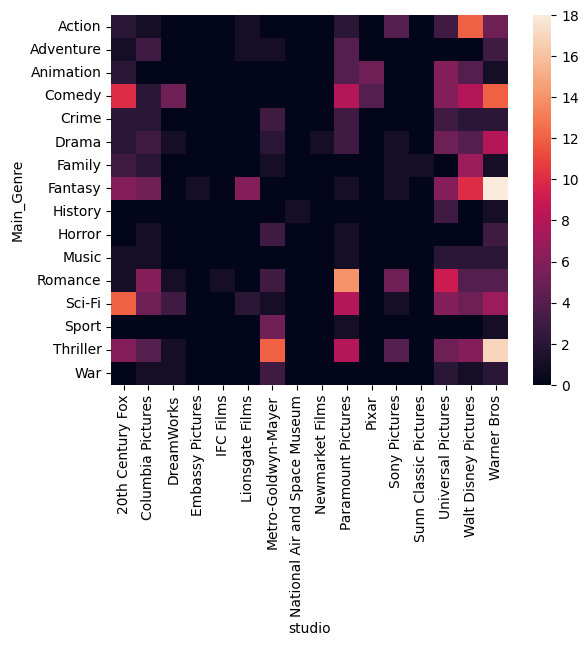

In [10]:
sns.heatmap(cross_tab);

### 2.2. Error bars

function plt.errorbar:
* yerr : specify the error
* marker : specify the type of marker
* markerfacecolor, markeredgecolor : color of the marker
* capsize : size of the end of errorbar

function plt.fillbetween:
* y1, y2 : two extreme value 
* ! Need to add the curve itself (plt.plot(...))


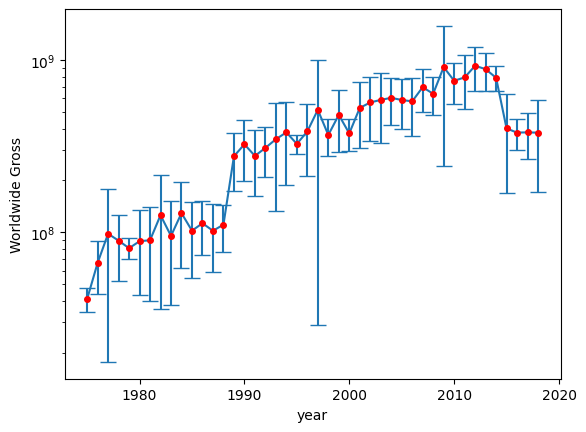

In [18]:
gross_per_year = movies.groupby('year')['worldwide_gross'].agg(['mean','std']).reset_index()

# Write your code to make plot with errorbars here
plt.errorbar(gross_per_year.year,
             gross_per_year['mean'],
             yerr=gross_per_year['std'],
             marker = 'o', 
             markersize='4', 
             markerfacecolor = 'r',
             markeredgecolor = 'r', 
             capsize=6)

plt.xlabel('year')
plt.ylabel('Worldwide Gross')
plt.semilogy()
plt.show()

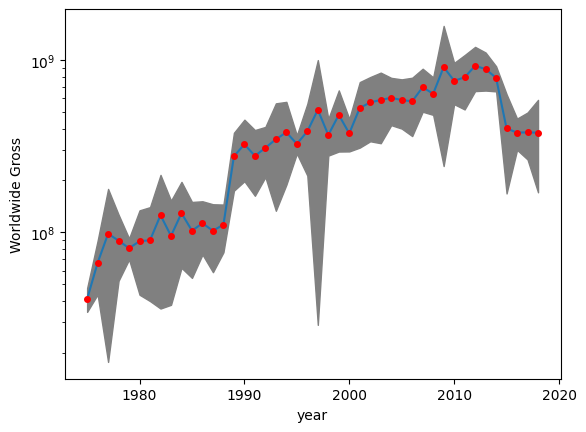

In [19]:
y1 = gross_per_year['mean'] - gross_per_year['std']
y2 = gross_per_year['mean'] + gross_per_year['std']
plt.xlabel('year')
plt.ylabel('Worldwide Gross')
plt.fill_between(gross_per_year.year, 
                 y1,
                 y2, 
                 color = 'gray')
plt.plot(gross_per_year.year,
         gross_per_year['mean'], 
         marker = 'o', 
         markersize='4', 
         markerfacecolor = 'r',
         markeredgecolor = 'r')
plt.semilogy()
plt.show()

### 2.3 Subplots

Text(0, 0.6, 'Number of movies')

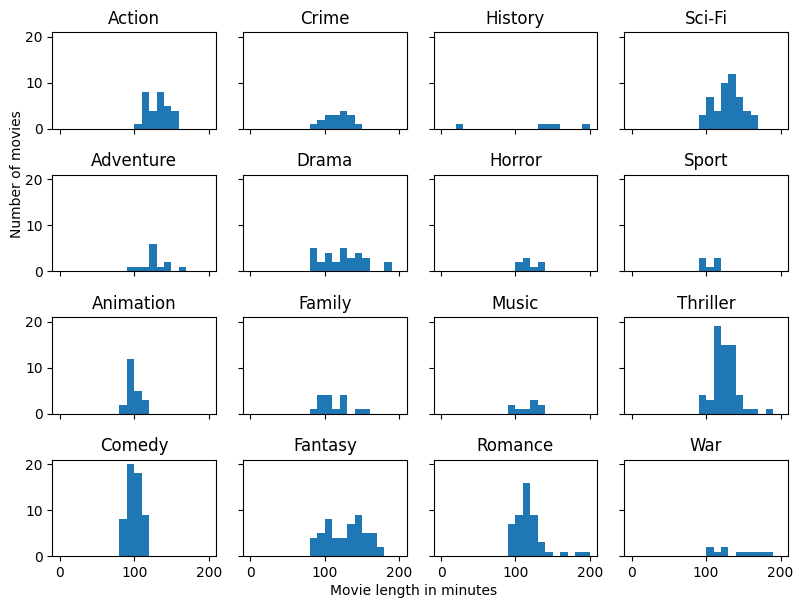

In [22]:
# Write your code to make 4x4 panel here
stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({
        'length': x['length'].values
    }))

fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)

for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)]
    sbplt.hist(stats_by_genre.iloc[i].values,range = [0,200],bins = 20)
    sbplt.set_title(stats_by_genre.index[i])
    
fig.tight_layout()

fig.text(0.4,0, "Movie length in minutes")
fig.text(0,0.6, "Number of movies", rotation = 90)

### 2.4 histograms and CCDF

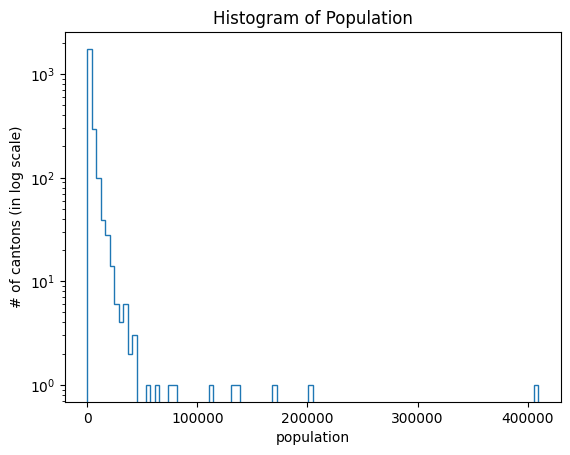

In [23]:
array_100 = plt.hist(pop_per_commune.population_Dec,bins=100,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

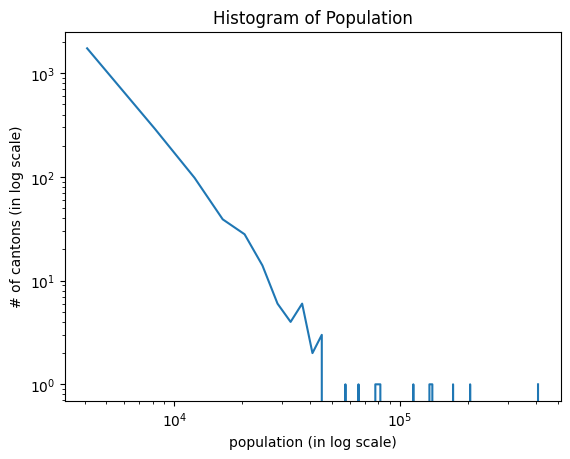

In [24]:
plt.loglog(array_100[1][1:],array_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

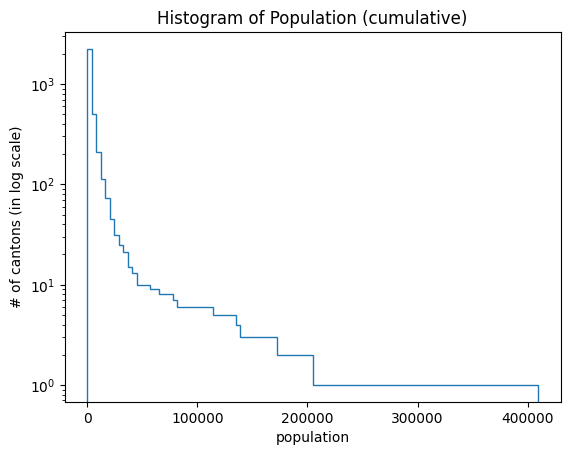

In [25]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=-1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

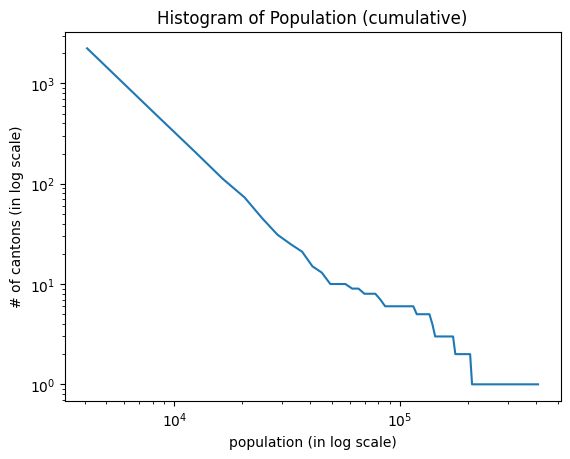

In [26]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

## WEEK 3: Describing Data

In [27]:
#usefull packages
from statsmodels.stats import diagnostic
from scipy import stats

### 3.1 Test distribution

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
diagnostic.kstest_normal(iris['sepal_length'].values, dist = 'norm')

(0.08865361377316228, 0.010290764353487069)

- p_value > 0.05 : cannot reject hypothesis H0 that the data comes from a normal distribution

In [47]:
diagnostic.kstest_normal(iris['sepal_length'].values, dist = 'exp')

(0.5223793388271812, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

### 3.2 Check correlation

In [48]:
stats.pearsonr(iris['sepal_length'],iris['petal_length'])

PearsonRResult(statistic=0.8717537758865831, pvalue=1.0386674194498827e-47)

- There is a strong (0.87) and significant (p < 0.05) positive correlation.

In [49]:
stats.spearmanr(iris['sepal_length'],iris['petal_length'])

SignificanceResult(statistic=0.881898126434986, pvalue=3.4430872780470036e-50)

- Spearman rank coorrelation is also significant.

### 3.2 Hypothesis testing

In [55]:
stats.ttest_ind(iris.query("species == 'setosa'")['sepal_width'],iris.query("species == 'virginica'")['sepal_width'])

TtestResult(statistic=6.45034908963073, pvalue=4.2463553818449584e-09, df=98.0)

- p < 0.05 : can reject the null hypothesis that the mean are the same

- if p > 0.05: cannot reject the null hypothesis that the mean are the same -> no significant difference

### 3.3 Measure uncertainty

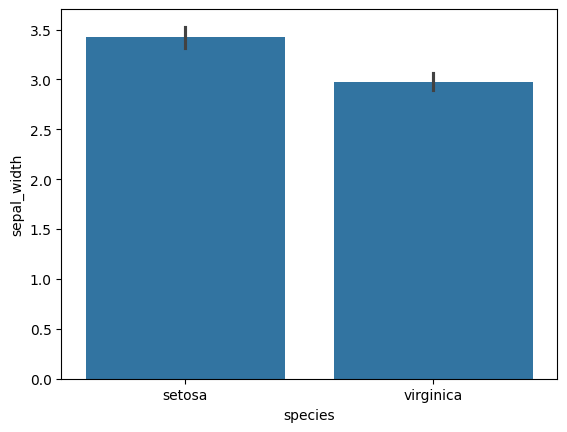

In [57]:
ax = sns.barplot(x="species", y="sepal_width", data=iris.loc[iris['species'].isin(['setosa','virginica'])])

No overlap -> there is a difference

### 3.4 Bootstrap confidence interval

In [60]:
def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.
    
    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate
    
    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    means = np.zeros(iterations)
    
    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(bootstrap_sample)
        
    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)
    
    return (lower_bound, upper_bound)